# Hi There<img src="https://raw.githubusercontent.com/ABSphreak/ABSphreak/master/gifs/Hi.gif" width="40" height="40"/>


#  ✨ We're Serial Kernels Team 🐉

# ✨ Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('bmh')
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import lightgbm
from xgboost import XGBRegressor
from xgboost import plot_importance
from  sklearn.ensemble import  GradientBoostingRegressor
from sklearn.metrics import mean_squared_log_error
%matplotlib inline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MaxAbsScaler,PowerTransformer,MinMaxScaler,RobustScaler, StandardScaler, Normalizer, QuantileTransformer,OneHotEncoder,OrdinalEncoder

from sklearn.inspection import permutation_importance

from sklearn.compose import ColumnTransformer

from scipy.stats import skew

from scipy import stats
from scipy.stats import norm

import warnings
warnings.filterwarnings('ignore')

# ✨ Loading Data

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
train_df=pd.read_csv('../input/seoul-bike-rental-ai-pro-iti/train.csv',index_col='ID')
test_df=pd.read_csv('../input/seoul-bike-rental-ai-pro-iti/test.csv',index_col='ID')
test_ID=test_df.index
display(train_df.head())

/kaggle/input/seoul-bike-rental-ai-pro-iti/sample_submission.csv
/kaggle/input/seoul-bike-rental-ai-pro-iti/train.csv
/kaggle/input/seoul-bike-rental-ai-pro-iti/test.csv


,Date,y,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
ID,,,,,,,,,,,,,,
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


# ✨ EDA

In [3]:
display(train_df.describe().T)
display(train_df.info())

,count,mean,std,min,25%,50%,75%,max
y,5760.0,703.483854,655.249491,0.0,188.00,485.50,1066.000,3556.00
Hour,5760.0,11.500000,6.922788,0.0,5.75,11.50,17.250,23.00
Temperature(�C),5760.0,12.803559,11.902206,-15.1,3.20,13.70,22.225,39.40
Humidity(%),5760.0,58.361806,19.840167,0.0,43.00,57.00,73.000,98.00
Wind speed (m/s),5760.0,1.723333,1.047898,0.0,0.90,1.50,2.300,7.40
Visibility (10m),5760.0,1473.711458,585.879880,27.0,1025.75,1732.00,2000.000,2000.00
Dew point temperature(�C),5760.0,4.058264,13.003582,-26.9,-5.40,5.20,14.700,27.20
Solar Radiation (MJ/m2),5760.0,0.572325,0.869943,0.0,0.00,0.01,0.940,3.52
Rainfall(mm),5760.0,0.135122,1.075320,0.0,0.00,0.00,0.000,35.00
Snowfall (cm),5760.0,0.046302,0.323728,0.0,0.00,0.00,0.000,5.10


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5760 entries, 0 to 5759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       5760 non-null   object 
 1   y                          5760 non-null   int64  
 2   Hour                       5760 non-null   int64  
 3   Temperature(�C)            5760 non-null   float64
 4   Humidity(%)                5760 non-null   int64  
 5   Wind speed (m/s)           5760 non-null   float64
 6   Visibility (10m)           5760 non-null   int64  
 7   Dew point temperature(�C)  5760 non-null   float64
 8   Solar Radiation (MJ/m2)    5760 non-null   float64
 9   Rainfall(mm)               5760 non-null   float64
 10  Snowfall (cm)              5760 non-null   float64
 11  Seasons                    5760 non-null   object 
 12  Holiday                    5760 non-null   object 
 13  Functioning Day            5760 non-null   objec

None

### Checking Duplicates

In [4]:
#duplicates Checking
train_df.duplicated().sum()

0

#### ⚡ No Duplicates

### Checking Missing Data

In [5]:
print(train_df.isnull().sum())
print(test_df.isnull().sum())

Date                         0
y                            0
Hour                         0
Temperature(�C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(�C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64
Date                         0
Hour                         0
Temperature(�C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(�C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64


#### ⚡ No Missing Data

In [6]:
# see the mean of label to every unique value of each column
#may be helpful to know most important features and for featur engineerng and encoding
def insights(df):
    for col in df.columns:
        if col=='y':
            continue
        else:
            display(df[[col, 'y']].groupby([col], as_index=False).mean().sort_values(by='y', ascending=False).T)

In [7]:
insights(train_df)

,149,221,89,233,137,185,66,173,53,41,...,212,70,105,45,106,34,112,21,123,224
Date,13/06/2018,19/06/2018,08/06/2018,20/06/2018,12/06/2018,16/06/2018,06/07/2018,15/06/2018,05/06/2018,04/06/2018,...,18/09/2018,06/11/2018,09/10/2018,04/10/2018,09/11/2018,03/11/2018,10/05/2018,02/10/2018,11/04/2018,19/09/2018
y,1506.208333,1472.875,1462.625,1443.291667,1439.333333,1431.666667,1403.166667,1395.5,1392.666667,1385.708333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,18,19,17,20,21,8,16,22,15,14,...,7,11,0,10,1,2,6,3,5,4
Hour,18.0000,19.0000,17.000000,20.000000,21.000000,8.000000,16.000000,22.000,15.000000,14.000,...,7.000000,11.000,0.000000,10.000000,1.0000,2.000000,6.0000,3.000000,5.000000,4.000000
y,1508.8875,1199.0875,1145.395833,1074.241667,1034.479167,1000.254167,930.329167,920.525,828.929167,762.625,...,604.316667,599.725,540.654167,524.970833,419.2875,294.354167,290.8125,198.366667,139.745833,131.704167


,491,509,461,464,407,405,397,497,285,432,...,27,16,21,28,13,32,4,2,10,3
Temperature(�C),35.2,37.8,32.2,32.5,26.800000,26.6,25.800000,36.1,14.600000,29.30,...,-11.3,-12.5,-11.9,-11.200,-12.8,-10.8,-14.1,-14.6,-13.1,-14.3
y,1947.0,1929.0,1839.6,1681.0,1623.416667,1588.0,1565.916667,1553.0,1548.833333,1535.25,...,80.5,76.0,75.5,74.125,70.0,62.0,42.0,35.0,34.0,30.0


,3,35,33,34,42,21,51,11,64,31,...,76,77,80,81,82,78,85,84,83,79
Humidity(%),16.0,48.000000,46.000000,47.000000,55.00,34.000000,64.00,24.00,77.000000,44.000000,...,89.000000,90.000000,93.00,94.000000,95.000000,91.000000,98.000000,97.000000,96.000000,92.000000
y,955.0,934.695652,917.654321,911.788991,895.58,892.666667,886.47,871.25,868.352941,853.061404,...,306.204545,272.133333,251.56,196.151515,174.833333,174.428571,165.930233,159.268293,134.153846,130.944444


,60,25,28,36,31,24,62,19,26,27,...,3,45,0,40,57,58,44,54,59,61
Wind speed (m/s),7.2,2.500000,2.800000,3.600000,3.1,2.400000,7.4,1.900000,2.600000,2.700000,...,0.300000,4.500000,0.000000,4.000000,6.0,6.1,4.4,5.4,6.7,7.3
y,1805.0,980.254545,944.010309,929.769231,917.0,916.725352,913.0,897.964029,878.779661,877.833333,...,419.366071,412.823529,412.435484,402.034483,375.0,336.0,326.8,233.0,146.0,133.0


,625,875,890,814,353,576,778,740,498,1096,...,318,751,261,716,156,1105,672,741,1380,281
Visibility (10m),919.0,1225.0,1245.0,1152.0,566.0,857.0,1109.0,1063.0,758.0,1478.0,...,521.0,1075.0,456.0,1033.0,328.0,1488.0,975.0,1064.0,1792.0,478.0
y,2664.0,2481.0,2479.0,2474.0,2440.0,2379.0,2276.0,2248.0,2246.0,2191.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,422,420,377,486,510,408,370,395,402,403,...,9,17,12,38,21,10,133,11,24,15
Dew point temperature(�C),17.10,16.900000,12.600000,23.5,25.9,15.7,11.90000,14.4,15.1000,15.2,...,-24.2,-23.400000,-23.9,-21.3,-23.0,-24.1,-11.8,-24.0,-22.7,-23.6
y,1781.75,1745.111111,1717.230769,1618.5,1553.0,1476.4,1443.62963,1425.3,1367.0625,1358.2,...,124.0,120.666667,114.0,105.0,87.0,81.0,39.5,36.0,33.0,30.0


,126,70,339,335,127,37,121,59,305,193,...,0,67,241,15,140,130,244,114,175,320
Solar Radiation (MJ/m2),1.26,0.7,3.52,3.39,1.270000,0.370,1.21,0.590,3.070000,1.93,...,0.000000,0.670000,2.41,0.1500,1.4,1.3,2.440000,1.140000,1.75,3.22
y,2065.60,1909.2,1865.00,1675.00,1647.571429,1562.875,1539.75,1505.625,1476.666667,1460.25,...,484.394913,478.666667,477.00,459.5625,455.5,439.6,416.666667,377.111111,268.20,0.00


,0,8,10,19,1,5,34,2,6,4,...,14,26,29,36,24,21,35,41,40,27
Rainfall(mm),0.000000,0.9,1.1,4.0,0.100000,0.500000,11.5,0.2,0.7,0.400000,...,1.9,7.0,8.5,12.5,6.0,5.0,12.0,18.5,18.0,7.5
y,736.652174,723.5,401.0,294.0,288.423077,259.582278,187.0,183.0,165.0,160.818182,...,22.0,22.0,19.5,17.0,15.4,15.0,13.0,11.0,10.5,9.0


,0,7,15,2,23,12,20,6,17,18,...,24,1,16,34,35,28,33,29,30,32
Snowfall (cm),0.000000,0.7,1.7,0.200000,2.5,1.4,2.200000,0.6,1.9,2.0,...,2.600000,0.1,1.8,5.0,5.1,3.9,4.8,4.0,4.1,4.3
y,720.744086,241.0,235.5,233.545455,228.5,214.5,212.666667,208.4,206.5,192.4,...,105.909091,102.5,96.0,76.0,62.0,58.0,40.0,36.0,35.0,25.0


,2,0,1,3
Seasons,Summer,Autumn,Spring,Winter
y,1085.705556,843.493056,652.969444,231.767361


,1,0
Holiday,No Holiday,Holiday
y,711.452536,520.204167


,1,0
Functioning Day,Yes,No
y,735.002177,0.0


**Let's see the skeweness of the data**

In [8]:
# Calc the skeweness of each continous feature

def calc_skew(df):
    print("\nIF THE DATA IS HIGHLY SKEWED IF SKWENESS  > 1 OR < -1 \n")
    for col in df.loc[:, df.dtypes != np.object ]:
        print("the skewness of ",col,"is :",df[col].skew())

calc_skew(train_df)


IF THE DATA IS HIGHLY SKEWED IF SKWENESS  > 1 OR < -1 

the skewness of  y is : 1.1590601920920565
the skewness of  Hour is : 0.0
the skewness of  Temperature(�C) is : -0.17155896336658052
the skewness of  Humidity(%) is : 0.11063674176092278
the skewness of  Wind speed (m/s) is : 0.9364808387049572
the skewness of  Visibility (10m) is : -0.8072259539269564
the skewness of  Dew point temperature(�C) is : -0.3208664382917592
the skewness of  Solar Radiation (MJ/m2) is : 1.4856003486591776
the skewness of  Rainfall(mm) is : 15.636451487279034
the skewness of  Snowfall (cm) is : 8.908510527779756


* It's noticed that the y is highly Skewed

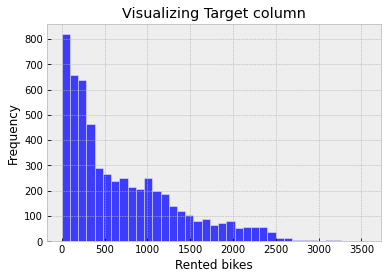

In [9]:
#Left Skewed Label
_=sns.histplot(train_df['y'])
_=plt.title("Visualizing Target column")
_=plt.xlabel("Rented bikes")
_=plt.ylabel("Frequency")

#### Ploting the features against target 

In [10]:
def drawFeatures_VS_y(df):
    for col in df.columns:
        temperature_rental = train_df.groupby(col,as_index=False)['Hour'].mean()
        sns.scatterplot(data = temperature_rental,x=col,y='Hour')
        plt.title(col)
        plt.show()

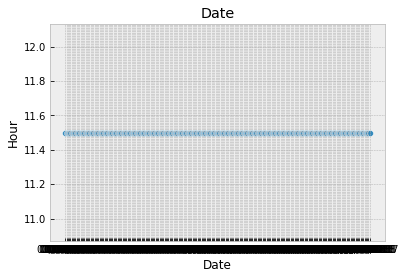

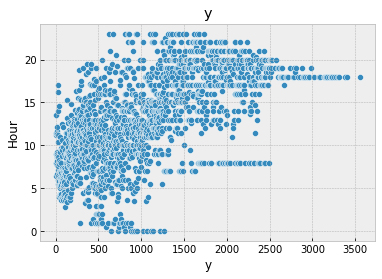

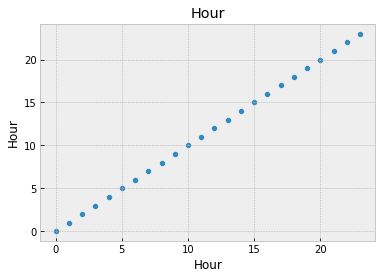

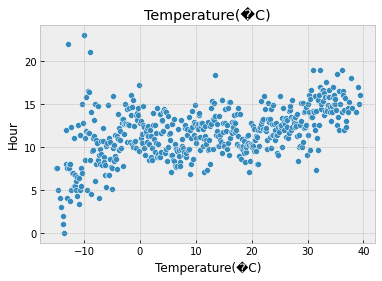

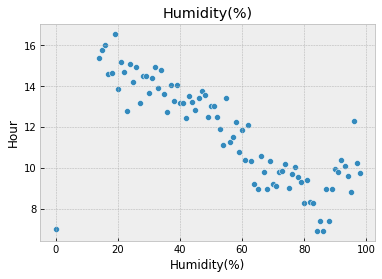

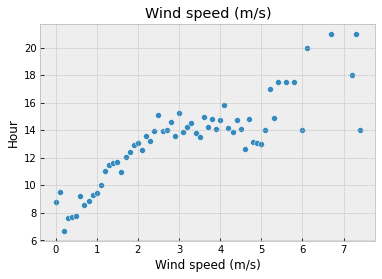

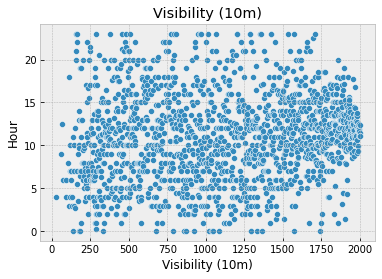

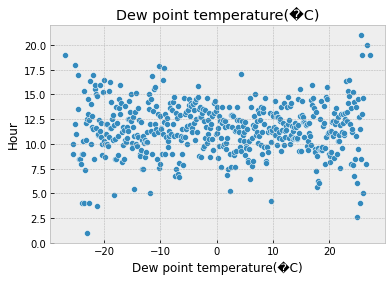

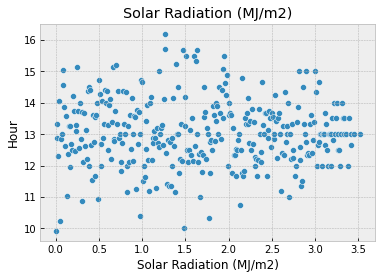

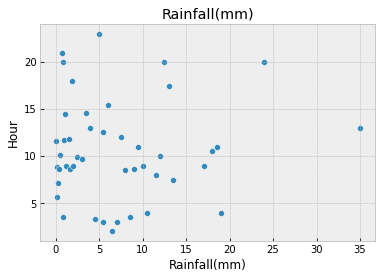

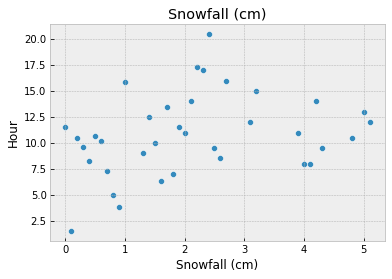

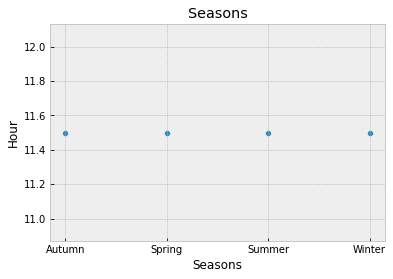

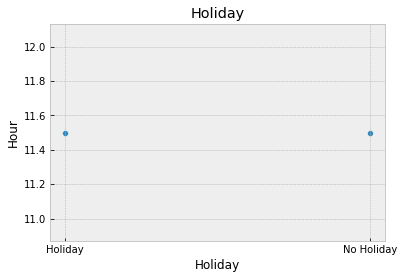

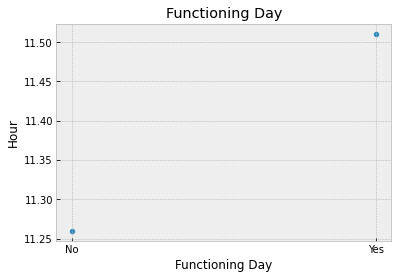

In [11]:
#Draw scatter plot between each feature and Target

drawFeatures_VS_y(train_df)

# ✨ Feature Engineering

In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5760 entries, 0 to 5759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       5760 non-null   object 
 1   y                          5760 non-null   int64  
 2   Hour                       5760 non-null   int64  
 3   Temperature(�C)            5760 non-null   float64
 4   Humidity(%)                5760 non-null   int64  
 5   Wind speed (m/s)           5760 non-null   float64
 6   Visibility (10m)           5760 non-null   int64  
 7   Dew point temperature(�C)  5760 non-null   float64
 8   Solar Radiation (MJ/m2)    5760 non-null   float64
 9   Rainfall(mm)               5760 non-null   float64
 10  Snowfall (cm)              5760 non-null   float64
 11  Seasons                    5760 non-null   object 
 12  Holiday                    5760 non-null   object 
 13  Functioning Day            5760 non-null   objec

#### Data Uderstanding

* ID : an ID for this instance
* Date : year-month-day ,type : str
* Hour : Hour of he day ,type int
* Temperature : Temperature in Celsius,type : Float
* Humidity - % : type : int 
* Windspeed - m/s : Speed of the wind , type : Float
* Visibility - 10m: type : int
* Dew point temperature - Celsius : Temperature at the beggining of the day, type : Float
* Solar radiation - MJ/m2 : Sun contribution, type : Float
* Rainfall - mm : Amount of rain in mm, type : Float
* Snowfall - cm : Amount of snow in cm, type : Float
* Seasons : Winter, Spring, Summer, Autumn
* Holiday : Holiday/No holiday
* Functional Day : NoFunc(Non Functional Hours), Fun(Functional hours)
* y : Rented Bike count (Target), Count of bikes rented at each hour




*Let's Visualize the Faunctioning day with Y*

In [13]:
VizSeasons=pd.DataFrame(train_df.groupby('Seasons').sum()['y'].sort_values(ascending=False))
VizSeasons.style.background_gradient(cmap=sns.light_palette("red", as_cmap=True))

,y
Seasons,
Summer,1563416
Autumn,1214630
Spring,940276
Winter,333745


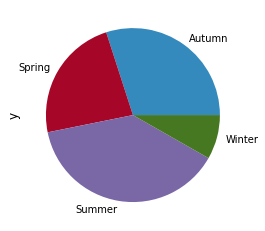

In [14]:
train_df.groupby('Seasons').sum()['y'].plot.pie();

In [15]:
VizHoliday=pd.DataFrame(train_df.groupby('Holiday').sum()['y'].sort_values(ascending=False))
VizHoliday.style.background_gradient(cmap=sns.light_palette("red", as_cmap=True))

,y
Holiday,
No Holiday,3927218
Holiday,124849


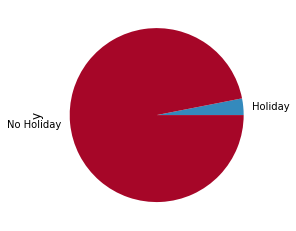

In [16]:
train_df.groupby('Holiday').sum()['y'].plot.pie();

In [17]:
VizFuncDay=pd.DataFrame(train_df.groupby('Functioning Day').sum()['y'].sort_values(ascending=False))
VizFuncDay.style.background_gradient(cmap=sns.light_palette("red", as_cmap=True))

,y
Functioning Day,
Yes,4052067
No,0


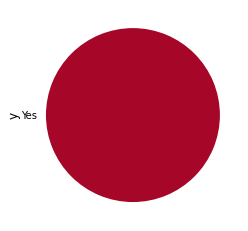

In [18]:
train_df.groupby('Functioning Day').sum()['y'].plot.pie();

In [19]:
train_df['Functioning Day'].value_counts()

Yes    5513
No      247
Name: Functioning Day, dtype: int64

* Summer has the highest bikes rented
* Functioning day has highest bikes if the system is ot no bikes will be rented
* Holiday people rent more bikes on working days
> Encode by get dummies

#### Extracting Features

In [20]:
# Adding Day Month Year to data frame
def add_day_month_year(df_):
    df_copy = df_.copy()
    df_copy['Date'] = pd.to_datetime(df_copy['Date'], 
     format = '%d/%m/%Y', 
     errors = 'coerce')
    df_copy['Year'] = df_copy['Date'].dt.year
    df_copy['Month'] = df_copy['Date'].dt.month
    df_copy['Day'] = df_copy['Date'].dt.day
    df_copy['weekday'] = df_copy['Date'].dt.dayofweek
    df_copy['weekofyear'] = df_copy['Date'].dt.weekofyear
    df_copy['dayofyear'] = df_copy['Date'].dt.dayofyear
    return df_copy

In [21]:
def add_week_end(df_):
    df_copy = df_.copy()
    df_copy['weekEnd'] = df_copy['weekday'] >= 5
    return df_copy

In [22]:
#Calculate if it day or night and the hours of the day the bikes rented the most these ours are :8,17,18,19,20,21
def add_rush_hours(df_):
    df_copy = df_.copy()
    df_copy['RushHour']= df_copy['Hour'].isin([8,17,18,19,20,21])
    return df_copy


In [23]:
def add_day_or_night(df_):
    df_copy = df_.copy()
    df_copy['DayorNight'] = (df_copy['Hour'] >= 7) & (df_copy['Hour'] <= 20)
    return df_copy

In [24]:
def add_temp_bin(df_):
    df_copy = df_.copy()
    df_copy['Temperature(�C)'] = df_copy['Temperature(�C)'].round()
    df_copy['temp_bin']=np.floor(df_copy['Temperature(�C)'])//5
    return df_copy

In [25]:
def vapor_saturated(df_):
    df_copy = df_.copy()
    df_copy['SaturatedVapor'] = (6.11)*(10**((7.5*df_copy['Temperature(�C)'])/(237.3+df_copy['Temperature(�C)'])))
    df_copy['ActualVapor'] = (6.11)*(10**((7.5*df_copy['Dew point temperature(�C)'])/(237.3+df_copy['Dew point temperature(�C)'])))
    return df_copy

In [26]:
def add_peak(train_data,col):
    train_data['peak'] =train_data[[col[0], col[1]]].apply\
    (lambda x: (0, 1)[(x[col[1]] == 1 and( x[col[0]] == 8 or 17 <= x[col[0]] <= 18 or 12 <= x[col[0]] <= 13)) or (x[col[1]] == 0 and 10 <= x[col[0]] <= 19)], axis = 1)
   
    return train_data

In [27]:
def add_sticky(train_data,cols):
    train_data['sticky'] = train_data[[cols[0], cols[1]]].apply\
    (lambda x: (0, 1)[x[cols[1]] == 1 and x[cols[0]] >= 60], axis = 1)
    return train_data

In [28]:
def add_ideal(train_data):
    train_data['ideal']=train_data[['Temperature(�C)', 'Wind speed (m/s)']].apply(lambda x: (0, 1)[x['Temperature(�C)'] > 27 and x['Wind speed (m/s)'] < 30], axis = 1)
    return train_data

In [29]:
def add_lag(test_df,train_df,column):
    result = merge_test_train(test_df,train_df)
    plt.acorr(result[column].astype(float), maxlags=30)
    t1 = result[column].shift(+1).to_frame()
    t1.columns = ["t-1"]
    t2 = result[column].shift(+2).to_frame()
    t2.columns = ["t-2"]
    t3 = result[column].shift(+3).to_frame()
    t3.columns = ["t-3"]
    t4 = result[column].shift(+4).to_frame()
    t4.columns = ["t-4"]
    t5 = result[column].shift(+5).to_frame()
    t5.columns = ["t-5"]
    result = pd.concat([result, t1, t2, t3,t4,t5], axis=1)
    test_df,train_df = split_test_train(result)
    return(test_df,train_df)

In [30]:
def CBA(df):
    df_copy=df.copy()
    df_copy['CBA_tmp'] = (df_copy['Temperature(�C)'] - df_copy['Dew point temperature(�C)']) * 400
    
    cba=[]
    
    for val in df_copy['CBA_tmp']:
        if val < 6500:
            cba.append(0) ##lowCloud
        elif val >= 6500 and val < 20000:
            cba.append(1) ##midCloud
        elif val >= 20000:
            cba.append(2) ##  highClouds --> No highCloud in data
            
    df['CBA']=cba  
    return df

In [31]:
def THI_map(value):
    if value < 40:
        return 'A'
    elif value < 50:
        return 'B'
    elif value < 60:
        return 'C'
    elif value < 70:
        return 'D'
    elif value < 80:
        return 'E'
    else :
        return 'F'
    
def add_THI(df_):
    df_copy = df_.copy()
    df_copy['THI'] = (.8 * df_copy['Temperature(�C)'] ) + (df_copy['Humidity(%)'] /100) * (df_copy['Temperature(�C)'] - 14.4) + 46.4
    df_copy['THI'] = df_copy['THI'].map(THI_map)
    
    return df_copy

In [32]:
def get_after_rain(df_):
    df_copy = df_.copy()
    raining_hour = df_copy.index[df_copy['Rainfall(mm)'] != 0 ]
    after_raining_hour = df_copy.loc[raining_hour + 1,:]
    after_raining_hour['after'] = after_raining_hour['Rainfall(mm)'] == 0
    df_copy = df_copy.merge(after_raining_hour,on = df_copy.columns.tolist(), how='left')
    df_copy = df_copy.fillna({'after':False})
    return df_copy

In [33]:
#Calc hourly rate per each hour calculate the number of bike renting
def create_Hourly_rate(df):
    hours=df['Hour'].unique()
    bikes_per_hour=[]
    for hour in hours:
        hour_df=df[df['Hour']==hour]
        bikes_per_hour.append(np.log1p(hour_df['y'].median()))
    return np.round(bikes_per_hour,0)

#Adding hourly_Avg Column to dataSet
def addHourlyRate(df,rates):
    df['HourlyAverage'] = np.resize(rates,len(df))
    return df

In [34]:
def split_test_train(result):
    test = result[result['y'].isna()]
    train = result[~result['y'].isna()]
    test.drop('y',inplace = True,axis = 1)
    return(test,train)

In [35]:
def merge_test_train(test,train):
    test['ds'] = test['Date'].astype(str)+' '+test['Hour'].astype(str)
    test['ds'] = pd.to_datetime(test['ds'], 
     format = '%d/%m/%Y %H', 
     errors = 'coerce')
    train['ds'] = train['Date'].astype(str)+' '+train['Hour'].astype(str)
    train['ds'] = pd.to_datetime(train['ds'], 
     format = '%d/%m/%Y %H', 
     errors = 'coerce')
    result = pd.concat([train,test]) 
    result.sort_values(by=['ds'])
    result.drop(columns=['ds'],inplace = True)
    return result

In [36]:
def get_after_snow(df_):
    df_copy = df_.copy()
    raining_hour = df_copy.index[df_copy['Snowfall (cm)'] != 0 ]
    after_raining_hour = df_copy.loc[raining_hour + 1,:]
    after_raining_hour['after_snow'] = after_raining_hour['Snowfall (cm)'] == 0
    df_copy = df_copy.merge(after_raining_hour,on = df_copy.columns.tolist(), how='left')
    df_copy = df_copy.fillna({'after_snow':False})
    return df_copy

In [37]:
def add_average_bikes_per_train(train_data,column):
    average=pd.DataFrame(train_data.groupby(train_data[column],as_index=False)['y'].median())
    train_data=pd.merge(train_data, average, how='left', on=[column])
    train_data.rename(columns={'y_x':'y','y_y':f'average_bikes_per_{column}'},inplace=True)
    return train_data

def add_average_bikes_per_test(train_data,test_data,column):
    new_test_df=pd.merge(test_data,train_data[[column,f'average_bikes_per_{column}']],on=[column],how='left')
    new_test_df.drop_duplicates(keep='first', inplace=True)
    new_test_df.index=test_data.index
    test_data=new_test_df
    return train_data,test_data

def add_average_bikes(train_data,test_data,column):
    train_data = add_average_bikes_per_train(train_data,column)
    train_data,test_data = add_average_bikes_per_test(train_data,test_data,column)
    return train_data,test_data


# ✨ Correlation

In [38]:
# fig, ax = plt.subplots(figsize=(20,8))
# cor_mat= train_data[:].corr()
# mask = np.array(cor_mat)
# mask[np.tril_indices_from(mask)] = False
# fig=plt.gcf()
# fig.set_size_inches(30,15)
# sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)
# plt.title("Columns Correlations");

In [39]:
#evaluation matrix
def rmsle(y_pred,y_true):
    y_pred = np.expm1(y_pred)
    y_true = np.expm1(y_true)
    log1=np.log(y_pred + 1)
    log2=np.log(y_true + 1)
    se = (log1 - log2) ** 2 
    mse=np.mean(se)
    return np.sqrt(mse)

# ✨ Model 1

In [40]:
def preprocessing_model1(df):
    train_df_copy = df.copy()
    train_df_copy = add_day_month_year(train_df_copy)
    train_df_copy = add_week_end(train_df_copy)
    train_df_copy = add_rush_hours(train_df_copy)
    train_df_copy = add_day_or_night(train_df_copy)
    train_df_copy = add_temp_bin(train_df_copy)
    train_df_copy = vapor_saturated(train_df_copy)
    train_df_copy = pd.get_dummies(train_df_copy)
    return train_df_copy

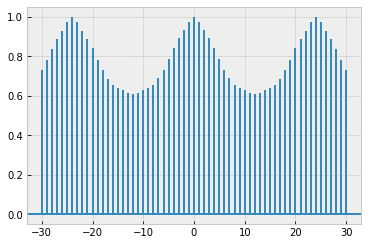

In [41]:
train_df_1 = train_df.copy()
test_df_1 = test_df.copy()
train_df_1 = preprocessing_model1(train_df_1)
test_df_1 = preprocessing_model1(test_df_1)
train_df_1,test_df_1 = add_average_bikes(train_df_1,test_df_1,'Month')
train_df_1,test_df_1 = add_average_bikes(train_df_1,test_df_1,'Hour')
test_df_1,train_df_1 = add_lag(test_df_1,train_df_1,'average_bikes_per_Hour')
train_df_1.fillna(0,inplace=True)
train_df_1.loc[train_df_1['Wind speed (m/s)']==0, 'Wind speed (m/s)'] = train_df_1['Wind speed (m/s)'].mean()
test_df_1.loc[test_df_1['Wind speed (m/s)']==0, 'Wind speed (m/s)'] = test_df_1['Wind speed (m/s)'].mean()
train_df_1 = add_peak(train_df_1,['Hour', 'Functioning Day_Yes'])
test_df_1 = add_peak(test_df_1,['Hour', 'Functioning Day_Yes'])
train_df_1 = add_sticky(train_df_1,['Humidity(%)', 'Functioning Day_Yes'])
test_df_1 = add_sticky(test_df_1,['Humidity(%)', 'Functioning Day_Yes'])

In [42]:
train_df_1['y'] = np.log1p(train_df_1['y'])
Y = train_df_1.y

In [43]:
train_df_1.drop(columns=['Date','y','Year', 'Dew point temperature(�C)','weekEnd','Day','Month','average_bikes_per_Hour','Hour'],inplace = True)
test_df_1.drop(columns=['Date','Year', 'Dew point temperature(�C)','weekEnd','Day','Month','average_bikes_per_Hour','Hour'],inplace = True)

In [44]:
scaler = RobustScaler()
train_df_1 = pd.DataFrame(scaler.fit_transform(train_df_1.astype(float)),columns=train_df_1.columns)
test_df_1 = pd.DataFrame(scaler.transform(test_df_1.astype(float)),columns=test_df_1.columns)

In [45]:
X_train, X_valid, y_train, y_valid = train_test_split(train_df_1,Y, train_size=0.9,random_state=297,stratify=train_df_1['Seasons_Summer'])

In [46]:
train_df_1.head()

,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),weekday,weekofyear,dayofyear,...,Functioning Day_No,Functioning Day_Yes,average_bikes_per_Month,t-1,t-2,t-3,t-4,t-5,peak,sticky
0,-1.000000,-0.666667,0.538462,0.275083,-0.010638,0.0,0.0,0.25,0.873786,0.891702,...,0.0,0.0,-0.809546,-1.224307,-1.223660,-1.223660,-1.223660,-1.22366,0.0,0.0
1,-1.052632,-0.633333,-0.538462,0.275083,-0.010638,0.0,0.0,0.25,0.873786,0.891702,...,0.0,0.0,-0.809546,-0.299374,-1.223660,-1.223660,-1.223660,-1.22366,0.0,0.0
2,-1.052632,-0.600000,-0.384615,0.275083,-0.010638,0.0,0.0,0.25,0.873786,0.891702,...,0.0,0.0,-0.809546,-0.554066,-0.267098,-1.223660,-1.223660,-1.22366,0.0,0.0
3,-1.052632,-0.566667,-0.461538,0.275083,-0.010638,0.0,0.0,0.25,0.873786,0.891702,...,0.0,0.0,-0.809546,-0.773905,-0.530499,-0.267098,-1.223660,-1.22366,0.0,0.0
4,-1.052632,-0.700000,0.615385,0.275083,-0.010638,0.0,0.0,0.25,0.873786,0.891702,...,0.0,0.0,-0.809546,-0.924039,-0.757856,-0.530499,-0.267098,-1.22366,0.0,0.0


### XGBOOST

In [47]:
xgmodel = XGBRegressor(objective='count:poisson',n_estimators=2500,learning_rate=0.1001,booster='dart',rate_drop=0.001,max_depth=4,
                     max_delta_step=1,subsample=0.7,colsample_bytree=0.9,colsample_bylevel=0.6,eval_metric='rmse',gamma=0.00005,
                    sample_type='weighted')
xgmodel.fit(X_train, y_train,
             eval_set=[(X_valid, y_valid)])


[0]	validation_0-rmse:5.55728
[1]	validation_0-rmse:5.50221
[2]	validation_0-rmse:5.44089
[3]	validation_0-rmse:5.37316
[4]	validation_0-rmse:5.29837
[5]	validation_0-rmse:5.21622
[6]	validation_0-rmse:5.12500
[7]	validation_0-rmse:5.02429
[8]	validation_0-rmse:4.91312
[9]	validation_0-rmse:4.79081
[10]	validation_0-rmse:4.65665
[11]	validation_0-rmse:4.51185
[12]	validation_0-rmse:4.35725
[13]	validation_0-rmse:4.19938
[14]	validation_0-rmse:4.04291
[15]	validation_0-rmse:3.89409
[16]	validation_0-rmse:3.75034
[17]	validation_0-rmse:3.61369
[18]	validation_0-rmse:3.48193
[19]	validation_0-rmse:3.35620
[20]	validation_0-rmse:3.23499
[21]	validation_0-rmse:3.11870
[22]	validation_0-rmse:3.00664
[23]	validation_0-rmse:2.89973
[24]	validation_0-rmse:2.79688
[25]	validation_0-rmse:2.69823
[26]	validation_0-rmse:2.60270
[27]	validation_0-rmse:2.51080
[28]	validation_0-rmse:2.42268
[29]	validation_0-rmse:2.33875
[30]	validation_0-rmse:2.25766
[31]	validation_0-rmse:2.18022
[32]	validation_0-

XGBRegressor(base_score=0.5, booster='dart', colsample_bylevel=0.6,
             colsample_bynode=1, colsample_bytree=0.9, eval_metric='rmse',
             gamma=5e-05, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.1001, max_delta_step=1,
             max_depth=4, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=2500, n_jobs=2,
             num_parallel_tree=1, objective='count:poisson', random_state=0,
             rate_drop=0.001, reg_alpha=0, reg_lambda=1, sample_type='weighted',
             scale_pos_weight=None, subsample=0.7, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [48]:
pred=xgmodel.predict(X_valid)
print(rmsle(pred,y_valid))
pred_model_xg=np.round(np.expm1(xgmodel.predict(test_df_1)))
pred_model_xg

0.32264196366250364


array([120., 124.,  95., ..., 848., 735., 537.], dtype=float32)

# ✨ Model 2

In [49]:
def preprocessing_model2(df):
    train_df_copy = df.copy()
    train_df_copy = add_day_month_year(train_df_copy)
    train_df_copy = add_week_end(train_df_copy)
    train_df_copy = add_rush_hours(train_df_copy)
    train_df_copy = CBA(train_df_copy)
    train_df_copy = get_after_rain(train_df_copy)
    train_df_copy = get_after_snow(train_df_copy)
    train_df_copy = add_THI(train_df_copy)
    train_df_copy = vapor_saturated(train_df_copy)
    #train_df_copy = add_WCI(train_df_copy)
    #train_df_copy = VRI(train_df_copy)
    #train_df_copy = heat_index(train_df_copy)
    #train_df_copy = pd.get_dummies(train_df_copy)
    return train_df_copy

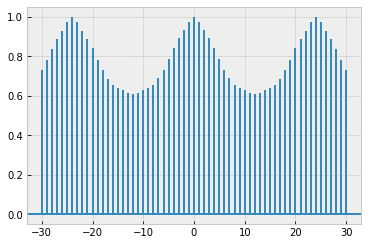

In [50]:
train_df_2 = train_df.copy()
test_df_2 = test_df.copy()
train_df_2 = preprocessing_model2(train_df_2)
test_df_2 = preprocessing_model2(test_df_2)
rates  = create_Hourly_rate(train_df_2)
train_df_2 = addHourlyRate(train_df_2,rates)
test_df_2 = addHourlyRate(test_df_2,rates)
train_df_2,test_df_2 = add_average_bikes(train_df_2,test_df_2,'Hour')
test_df_2,train_df_2 = add_lag(test_df_2,train_df_2,'average_bikes_per_Hour')
train_df_2,test_df_2 = add_average_bikes(train_df_2,test_df_2,'Month')
train_df_2.dropna(inplace=True)


In [51]:
#Droping columns from train and test
train_df_2['y'] = np.log1p(train_df_2['y'])
Y = train_df_2.y
train_df_2.drop(columns=['Date','y','Year','Day','ActualVapor','dayofyear','Dew point temperature(�C)','weekEnd','average_bikes_per_Hour'],inplace = True)
test_df_2.drop(columns=['Date','Year','Day','ActualVapor','dayofyear','Dew point temperature(�C)','weekEnd','average_bikes_per_Hour'],inplace = True)

In [52]:
X_train, X_valid, y_train, y_valid = train_test_split(train_df_2,Y,test_size=.2,random_state=297,stratify = train_df_2['Seasons'] )

In [53]:
pd.set_option("display.max_columns", None)
train_df_2.head()

,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,weekday,weekofyear,RushHour,CBA,after,after_snow,THI,SaturatedVapor,HourlyAverage,t-1,t-2,t-3,t-4,t-5,average_bikes_per_Month
5,5,-6.4,37,1.5,2000,0.00,0.0,0.0,Winter,No Holiday,Yes,12,4,48,False,0,False,False,A,3.785812,5.0,111.0,168.0,252.0,375.0,517.5,240.0
6,6,-6.6,35,1.3,2000,0.00,0.0,0.0,Winter,No Holiday,Yes,12,4,48,False,0,False,False,A,3.728008,5.0,130.5,111.0,168.0,252.0,375.0,240.0
7,7,-7.4,38,0.9,2000,0.00,0.0,0.0,Winter,No Holiday,Yes,12,4,48,False,0,False,False,A,3.504547,6.0,221.5,130.5,111.0,168.0,252.0,240.0
8,8,-7.6,37,1.1,2000,0.01,0.0,0.0,Winter,No Holiday,Yes,12,4,48,True,0,False,False,A,3.450575,7.0,404.5,221.5,130.5,111.0,168.0,240.0
9,9,-6.5,27,0.5,1928,0.23,0.0,0.0,Winter,No Holiday,Yes,12,4,48,False,0,False,False,A,3.756811,6.0,708.0,404.5,221.5,130.5,111.0,240.0


### Gradient Boosting 

In [54]:
categorical_cols = ['Seasons','Hour','THI']
ordinal_cols = ['Functioning Day','Holiday']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown = 'ignore'))
])
ordinal_transformer = Pipeline(steps=[
    ('ordinal', OrdinalEncoder(categories="auto"))
])
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols),
        ('cat2', ordinal_transformer, ordinal_cols)
    ],remainder='passthrough')
Robscaler=RobustScaler()
Maxscaler=MaxAbsScaler()
Powerscaler=PowerTransformer()

In [55]:
params = {'n_estimators': 6100,
          'max_depth':4 ,
          'loss':'huber',
          'max_features':'sqrt',
          'learning_rate' :0.0099 ,
          'min_samples_leaf':4,
          'min_samples_split':12,
          'random_state':137,
          'alpha' :.82,
          'subsample':.8}
gbm_model = GradientBoostingRegressor(**params)

In [56]:
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('sc',Robscaler),
                              ('model', gbm_model)
                             ],verbose = True)

In [57]:
my_pipeline.fit(X_train, y_train)
pred = my_pipeline.predict(X_valid)
print(rmsle(pred,y_valid))


[Pipeline] ...... (step 1 of 3) Processing preprocessor, total=   0.0s
[Pipeline] ................ (step 2 of 3) Processing sc, total=   0.0s
[Pipeline] ............. (step 3 of 3) Processing model, total=  44.0s
0.3104892982598706


In [58]:
pred_model_gbr = np.floor(np.expm1(my_pipeline.predict(test_df_2)))
pred_model_gbr

array([117., 119.,  78., ..., 787., 736., 567.])

# ✨ Making Predictions

### Ploting Distributions for both models

In [59]:
predictions = pd.DataFrame({'Seasons':test_df_2['Seasons'],'y_gbr': pred_model_gbr,'y_xgb':pred_model_xg})
predictions

,Seasons,y_gbr,y_xgb
0,Winter,117.0,120.0
1,Winter,119.0,124.0
2,Winter,78.0,95.0
3,Winter,59.0,63.0
4,Winter,37.0,35.0
...,...,...,...
2995,Autumn,1039.0,1025.0
2996,Autumn,877.0,825.0
2997,Autumn,787.0,848.0
2998,Autumn,736.0,735.0


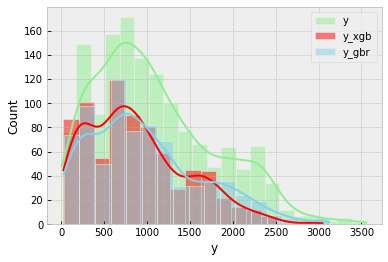

In [60]:
sns.histplot(train_df.loc[train_df['Seasons'] ==  'Summer', :],x='y',color="lightgreen",label="y",kde=True)
sns.histplot(predictions.loc[predictions['Seasons'] ==  'Summer', :],x='y_xgb',color="red",label="y_xgb",kde=True)
sns.histplot(predictions.loc[predictions['Seasons'] ==  'Summer', :],x='y_gbr',color="skyblue",label="y_gbr",kde=True)
plt.legend() 
plt.show()

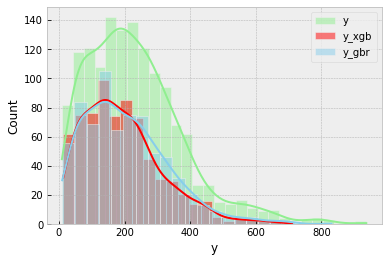

In [61]:
sns.histplot(train_df.loc[train_df['Seasons'] ==  'Winter', :],x='y',color="lightgreen",label="y",kde=True)
sns.histplot(predictions.loc[predictions['Seasons'] ==  'Winter', :],x='y_xgb',color="red",label="y_xgb",kde=True)
sns.histplot(predictions.loc[predictions['Seasons'] ==  'Winter', :],x='y_gbr',color="skyblue",label="y_gbr",kde=True)
plt.legend() 
plt.show()

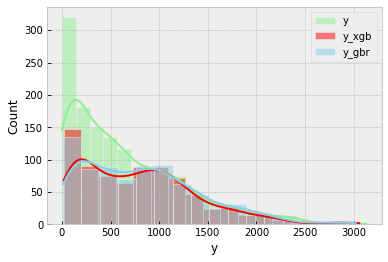

In [62]:
sns.histplot(train_df.loc[train_df['Seasons'] ==  'Spring', :],x='y',color="lightgreen",label="y",kde=True)
sns.histplot(predictions.loc[predictions['Seasons'] ==  'Spring', :],x='y_xgb',color="red",label="y_xgb",kde=True)
sns.histplot(predictions.loc[predictions['Seasons'] ==  'Spring', :],x='y_gbr',color="skyblue",label="y_gbr",kde=True)
plt.legend() 
plt.show()

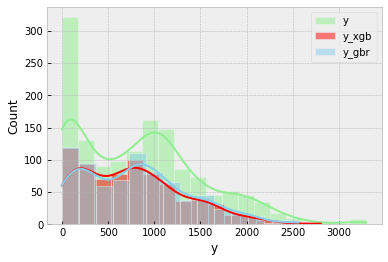

In [63]:
sns.histplot(train_df.loc[train_df['Seasons'] ==  'Autumn', :],x='y',color="lightgreen",label="y",kde=True)
sns.histplot(predictions.loc[predictions['Seasons'] ==  'Autumn', :],x='y_xgb',color="red",label="y_xgb",kde=True)
sns.histplot(predictions.loc[predictions['Seasons'] ==  'Autumn', :],x='y_gbr',color="skyblue",label="y_gbr",kde=True)
plt.legend() 
plt.show()

<AxesSubplot:xlabel='y_gbr', ylabel='Count'>

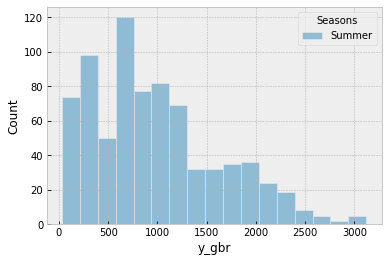

In [64]:
sns.histplot(predictions.loc[predictions['Seasons'] ==  'Summer', :],x='y_gbr',hue='Seasons')

<AxesSubplot:xlabel='y_gbr', ylabel='Count'>

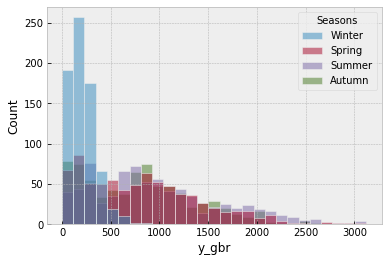

In [65]:
sns.histplot(predictions.iloc[:,:2],x='y_gbr',hue='Seasons')

<AxesSubplot:xlabel='y_xgb', ylabel='Count'>

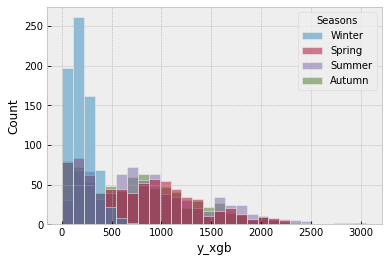

In [66]:
sns.histplot(predictions.iloc[:,[True,False,True]],x='y_xgb',hue='Seasons')

### Taking the best of both models

In [67]:
# spring and Summer from hist 
# winter and Autumn from xgboost
predictions.loc[predictions['Seasons'] ==  'Summer', 'y_xgb'] = predictions.loc[predictions['Seasons'] ==  'Summer', 'y_gbr']
predictions.loc[predictions['Seasons'] ==  'Spring', 'y_xgb'] = predictions.loc[predictions['Seasons'] ==  'Spring', 'y_gbr']


In [68]:
predictions

,Seasons,y_gbr,y_xgb
0,Winter,117.0,120.0
1,Winter,119.0,124.0
2,Winter,78.0,95.0
3,Winter,59.0,63.0
4,Winter,37.0,35.0
...,...,...,...
2995,Autumn,1039.0,1025.0
2996,Autumn,877.0,825.0
2997,Autumn,787.0,848.0
2998,Autumn,736.0,735.0


# 😄 Generating Submission File

In [69]:
x=predictions.loc[:,'y_xgb']
pred=pd.DataFrame({'ID':test_ID,'y': x})
pred.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
